In [13]:
# Размер исходного изображения 1920x1080

In [1]:
from PIL import Image
from pathlib import Path
from ImagesDownload import ImagesDownload
import matplotlib.pyplot as plt
import pandas as pd
from ImagesPreparing import ImagesPreparing

In [17]:
def plot_image(path:str):
    image = Image.open(path)
    plt.imshow(image)
    plt.show()
    print(f'imgsize: {image.size}')

In [3]:
# Группы предметов использующиеся в capcha
CAPCHA_LIST = ['Battery', 'Building material', 'Charging handle', 'Arm Band',
             'Common container', 'Drink', 'Drug', 'Electronics', 'Face Cover',
             'Food', 'Fuel', 'Household goods', 'Info', 'Jewelry', 'Keycard',
             'Knife', 'Lubricant', 'Medical item', 'Medical supplies', 'Medikit',
             'Night Vision', 'Other', 'Radio Transmitter', 'Repair Kits', 'Special item',
             'Stimulant', 'Throwable weapon', 'Tool']
IMAGES_DATA_PATH = Path('./Tarkov_items.csv')
RESOLUTION_DATA_PATH = Path('./Resolution_info.csv')
IMAGES_PATH = Path('./Images/')

In [4]:
items_df = pd.read_csv(IMAGES_DATA_PATH)

,normalizedName,shortName,gridImageLink,image512pxLink,width,height,gridImageLink.filepath,image512pxLink.filepath
0,colt-m4a1-556x45-assault-rifle,M4A1,https://assets.tarkov.dev/5447a9cd4bdc2dbd208b...,https://assets.tarkov.dev/5447a9cd4bdc2dbd208b...,1,1,gridImageLink.filepath/colt-m4a1-556x45-assaul...,image512pxLink.filepath/colt-m4a1-556x45-assau...
1,556x45mm-m855-ammo-pack-30-pcs,M855,https://assets.tarkov.dev/5447ac644bdc2d6c208b...,https://assets.tarkov.dev/5447ac644bdc2d6c208b...,1,1,gridImageLink.filepath/556x45mm-m855-ammo-pack...,image512pxLink.filepath/556x45mm-m855-ammo-pac...
2,factory-emergency-exit-key,Factory,https://assets.tarkov.dev/5448ba0b4bdc2d02308b...,https://assets.tarkov.dev/5448ba0b4bdc2d02308b...,1,1,gridImageLink.filepath/factory-emergency-exit-...,image512pxLink.filepath/factory-emergency-exit...


In [5]:
image_preparing = ImagesPreparing(images_data=items_df,
                                  save_path=IMAGES_PATH)
items_df = image_preparing.rescale_grid(h_grid='height',
                                        w_grid='width',
                                        column='image512pxLink.filepath',
                                        name='Items')

In [6]:
items_df = image_preparing.create_mask(column='Items',
                                       name='ItemMasks')

In [7]:
items_df = image_preparing.rescale_grid(h_grid='height',
                                        w_grid='width',
                                        column='gridImageLink.filepath',
                                        name='GridItems')

In [9]:
items_df.drop(
    columns=['gridImageLink.filepath',
             'image512pxLink.filepath',
             'gridImageLink',
             'image512pxLink'],
    inplace=True)

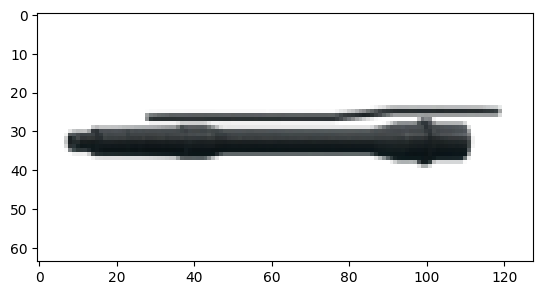

imgsize: (128, 64)


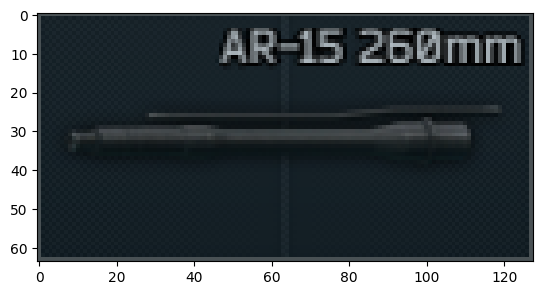

imgsize: (128, 64)


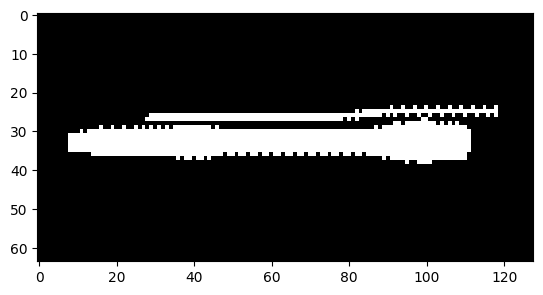

imgsize: (128, 64)


In [19]:
for path in items_df.loc[42, ['Items', 'GridItems', 'ItemMasks']]:
    plot_image(path)

In [14]:
# items_df.loc[42, ['Items', 'GridItems', 'ItemMasks']]

Items                Images/Items/item_42.png
GridItems    Images/GridItems/griditem_42.png
ItemMasks    Images/ItemMasks/itemmask_42.png
Name: 42, dtype: object